In [40]:
import pandas as pd
import requests
from pyquery import PyQuery as pq
import re
import random
import time
from selenium import webdriver


# 准备url

In [2]:
df = pd.read_excel('job_list.xlsx')

job_id_list = df['job_id'].to_list()

job_id_list

[12115926,
 12137524,
 12137853,
 11980246,
 11926550,
 12132307,
 12130978,
 12141369,
 11997529,
 11914683,
 11888370,
 12073394,
 12011821,
 12073976,
 12013456,
 12146380,
 12146373,
 12124544,
 12050738,
 12116969,
 11861468,
 12017806,
 12138190,
 12107778,
 12131451,
 11874041,
 12140912,
 12145856,
 11931770,
 12025128,
 12140221,
 11931770,
 12025128,
 11857964,
 11917568,
 12134603,
 12071731,
 12038335,
 12096754,
 12109196,
 12145257,
 12144325,
 12003329,
 11920302,
 12114204,
 12001990,
 11921147,
 11908841,
 12128167,
 11856820,
 12120425,
 12130597,
 11926562,
 11979976,
 12056384,
 12135205,
 12136063,
 12129644,
 12054310,
 11840636,
 12094831,
 11928350,
 12110789,
 12135172,
 11901278,
 12127125,
 12136063,
 11987842,
 12058921,
 12129644,
 12075356,
 11988588,
 12054310,
 11840636,
 12078483,
 11901278,
 12127125,
 12142666,
 12136063,
 11987842,
 12129644,
 12075356,
 11988588,
 12054310,
 11963859,
 11840636,
 12078483,
 12131525,
 12049634,
 11999877,
 12075356,

In [41]:
urL_template = 'https://www.lagou.com/wn/jobs/{job_id}.html'

url_list = []

for job_id in job_id_list:
    url = urL_template.format(job_id=job_id)
    url_list.append(url)
    
url_list

['https://www.lagou.com/wn/jobs/12075356.html',
 'https://www.lagou.com/wn/jobs/11988588.html',
 'https://www.lagou.com/wn/jobs/12054310.html',
 'https://www.lagou.com/wn/jobs/11963859.html',
 'https://www.lagou.com/wn/jobs/11840636.html',
 'https://www.lagou.com/wn/jobs/12078483.html',
 'https://www.lagou.com/wn/jobs/12131525.html',
 'https://www.lagou.com/wn/jobs/12049634.html',
 'https://www.lagou.com/wn/jobs/11999877.html',
 'https://www.lagou.com/wn/jobs/12075356.html',
 'https://www.lagou.com/wn/jobs/12054310.html',
 'https://www.lagou.com/wn/jobs/11963859.html',
 'https://www.lagou.com/wn/jobs/11840636.html',
 'https://www.lagou.com/wn/jobs/12078483.html',
 'https://www.lagou.com/wn/jobs/11904268.html',
 'https://www.lagou.com/wn/jobs/11836437.html',
 'https://www.lagou.com/wn/jobs/11985428.html',
 'https://www.lagou.com/wn/jobs/12053785.html',
 'https://www.lagou.com/wn/jobs/11981519.html',
 'https://www.lagou.com/wn/jobs/11925228.html',
 'https://www.lagou.com/wn/jobs/12116065

# 手动登录拉勾网

In [42]:
# 打开浏览器
browser = webdriver.Edge()

In [43]:
# 访问拉勾网
browser.get("https://www.lagou.com/")

#手动登录

# 函数：请求数据

In [44]:
def get_html(url):
    browser.get(url)
    
    wait_time = random.randint(3, 5) # 生成 3 到 5 秒的随机浮点数
    print(f"等待{wait_time}秒")
    
    time.sleep(wait_time)   # 暂停指定的秒数   
    
    html = browser.page_source
    return html

# 函数：解析数据

In [45]:
from pyquery import PyQuery as pq

def extract_job_description(html):
    doc = pq(html)
    job_desc_dict = {'advantage': None, 'job_detail': None, 'work_addr': None}

    try:
        for job_description in doc('dl.job_detail').items():
            job_desc_dict['advantage'] = job_description('dd.job-advantage p').text()
            job_desc_dict['job_detail'] = job_description('div.job-detail').text()
            work_addr = job_description('div.work_addr').text()
            job_desc_dict['work_addr'] = work_addr[:-4] 

    except Exception as e:
        print(f"解析数据失败: {e}")

    return job_desc_dict

# 测试

In [46]:
test_url = 'https://www.lagou.com/wn/jobs/11904268.html'
test_url


'https://www.lagou.com/wn/jobs/11904268.html'

等待4秒


'<html><head><script async="" src="https://s21.lgstatic.com/growth/activity/20210412/1618219685870.js" charset="UTF-8"></script><script src="https://pv.sohu.com/cityjson?ie=utf-8"> </script><meta name="viewport" content="width=device-width"><meta charset="utf-8"><link rel="Shortcut Icon" href="//www.lgstatic.com/lg-www-fed/common/static/favicon_faed927.ico"><script src="https://www.lgstatic.com/lg-www-node/static/_next/static/js/babel-polyfill/index.js"></script><script crossorigin="anonymous" src="https://lagou-zhaopin-fe.lagou.com/fed/lg-www-node/monitor/init-variable1.0.0.js"></script><script crossorigin="anonymous" src="https://lagou-zhaopin-fe.lagou.com/fed/apm-rum/elastic-apm-rum%405.9.1.js"></script><script crossorigin="anonymous" src="https://lagou-zhaopin-fe.lagou.com/npm/%40lagou/apm-rum%400.4.6/dist/index.umd.min.js"></script><script src="https://lagou-zhaopin-fe.lagou.com/npm/%40lagou/base-crypto%401.1.53/lib/main.js"></script><meta content="新媒体运营招聘,新媒体运营岗位职责,日升餐厨科技（广东）有限公司
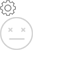
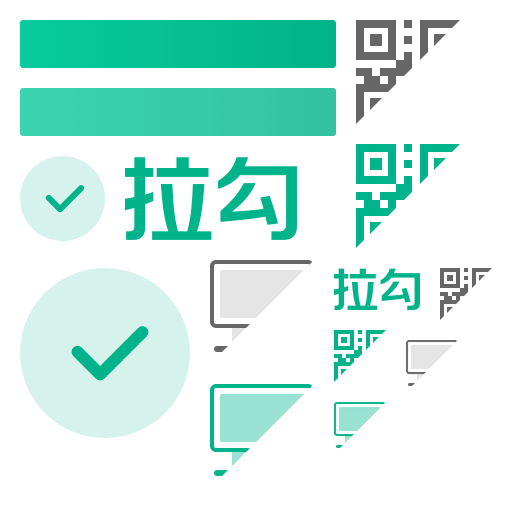
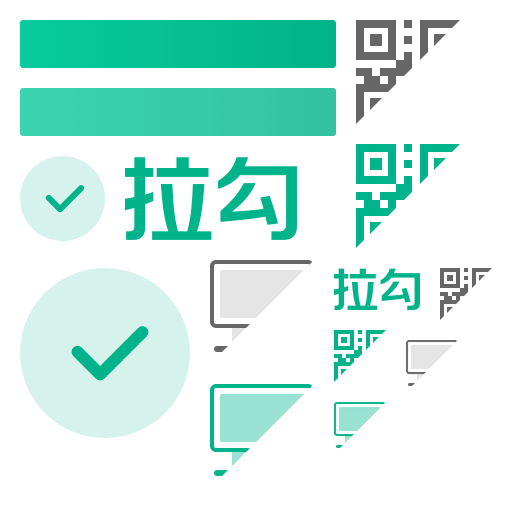
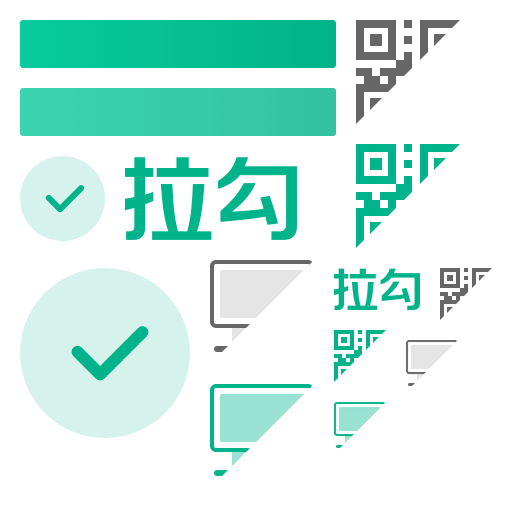
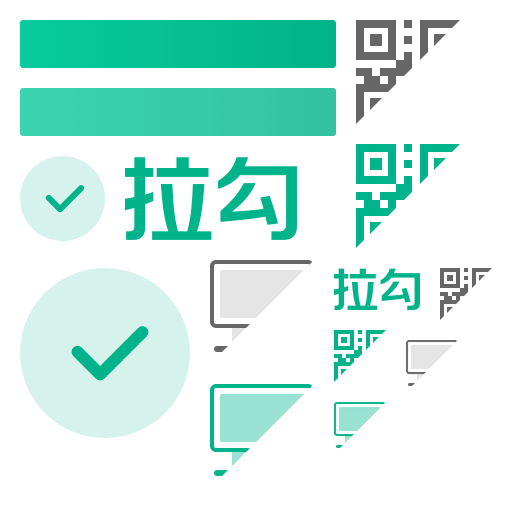
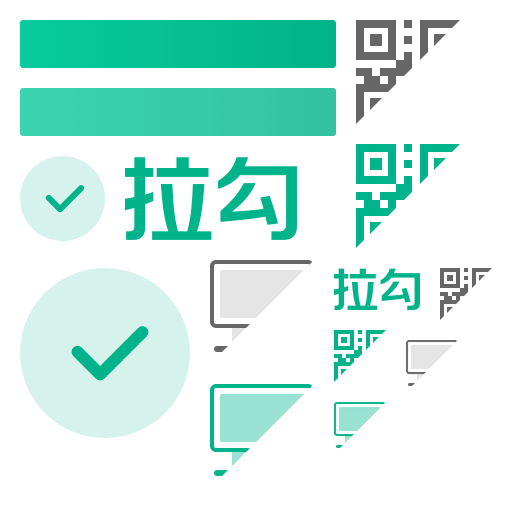
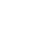
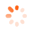
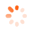

In [47]:

html = get_html(test_url)
html

In [48]:
job_desc_dict = extract_job_description(html)
job_desc_dict

{'advantage': None, 'job_detail': None, 'work_addr': None}

# 开始抓取

In [49]:
job_desc_list = []

for url in url_list:
    html = get_html(url)
    job_desc_dict = extract_job_description(html)
    
    job_desc_dict["job_id"] = re.findall(r'/jobs/(\d+).html', url)[0]  # 从url中提取工作岗位 ID, 并添加到字典中
    
    print(f"抓取的网页是：{url}")
    
    job_desc_list.append(job_desc_dict)  # 把抓取到的工作岗位描述字典添加到列表中
    
    print(f"已抓取及解析网页数量：{len(job_desc_list)}")
    
    
    wait_time = random.randint(23, 35) # 生成 23 到 35 秒的随机浮点数
    print(f"等待{wait_time}秒")
    
    time.sleep(wait_time)   # 暂停指定的秒数
    

print("抓取完成")

等待3秒
抓取的网页是：https://www.lagou.com/wn/jobs/12075356.html
已抓取及解析网页数量：1
等待34秒
等待5秒
抓取的网页是：https://www.lagou.com/wn/jobs/11988588.html
已抓取及解析网页数量：2
等待34秒
等待5秒
抓取的网页是：https://www.lagou.com/wn/jobs/12054310.html
已抓取及解析网页数量：3
等待24秒
等待3秒
抓取的网页是：https://www.lagou.com/wn/jobs/11963859.html
已抓取及解析网页数量：4
等待34秒
等待4秒
抓取的网页是：https://www.lagou.com/wn/jobs/11840636.html
已抓取及解析网页数量：5
等待33秒
等待5秒
抓取的网页是：https://www.lagou.com/wn/jobs/12078483.html
已抓取及解析网页数量：6
等待26秒
等待5秒
抓取的网页是：https://www.lagou.com/wn/jobs/12131525.html
已抓取及解析网页数量：7
等待31秒
等待5秒
抓取的网页是：https://www.lagou.com/wn/jobs/12049634.html
已抓取及解析网页数量：8
等待25秒
等待3秒
抓取的网页是：https://www.lagou.com/wn/jobs/11999877.html
已抓取及解析网页数量：9
等待29秒
等待4秒
抓取的网页是：https://www.lagou.com/wn/jobs/12075356.html
已抓取及解析网页数量：10
等待32秒
等待3秒
抓取的网页是：https://www.lagou.com/wn/jobs/12054310.html
已抓取及解析网页数量：11
等待26秒
等待4秒
抓取的网页是：https://www.lagou.com/wn/jobs/11963859.html
已抓取及解析网页数量：12
等待33秒
等待5秒
抓取的网页是：https://www.lagou.com/wn/jobs/11840636.html
已抓取及解析网页数量：13
等待30秒
等待4秒
抓取的网页是：https://w

# 检查数据

In [50]:
job_desc_list

[{'advantage': '五险一金,绩效奖金,员工旅游',
  'job_detail': '岗位职责：\n1、负责公司新媒体平台（包括但不限于小红书、视频号等）的内容策划、编辑、发布与维护；\n2、 制定并执行新媒体营销策略，打造IP账号，提供品牌知名度及影响力；\n3、 分析用户行为数据，优化内容策略，提高用户活跃度和粘性；\n4、协调内外部资源，与其他部门合作，共同完成营销目标；\n5、协调直播/线下活动组织及筹备落地。\n岗位要求：\n1、本科及以上学历，1年左右相关工作经验；汉语言文学、新闻学、广告媒体、市场营销等相关专业优先；\n2、有视频号、小红书的实操经验，有直播操盘经验优先考虑;\n3、有文字和视频创作能力，能够结合市场、用户、专业知识进行内容创作;\n4、有快速学习及应用能力;\n5、脑洞大、思维活跃，善于挖掘用户心理，敢于实践创新，具备较强的文字功底；\n6、有较强沟通及理解能力，善于独立思考，能快速找准工作需求，消化及落地执行;\n7、具有强烈的责任心和良好的团队合作意识。',
  'work_addr': '广州 - 番禺区- 工业一路10号',
  'job_id': '12075356'},
 {'advantage': '五险一金,绩效奖金,专业培训',
  'job_detail': '岗位职责】\n1、负责小红书&抖音的运营，对产出结果及转化量负责\n2、负责小红书&抖音的日常运营及推广，包括内容策划、制作，日常发布、维护互动\n3、定期分析小红书&抖音的数据，能对内容和数据进行复盘，及时对小红书发布内容进行调整和优化\n4、分析同行业小红书&抖音内容结构及话题热点，调研目标用户群体喜好，在此基础上定位客户需求及喜好，输出优质内容；\n5、了解小红书&抖音社区运营方式及规则\n6、整合全渠道推广资源，通过创意推广活动等提升品牌的知名度和曝光度。\n【岗位要求】\n1、大专以上的学历，有自媒体平台运营经验\n2、对平台算法敏感、对内容敏感、对流量敏感、对数据敏感，擅长做平台内容分析、用户画像分析等；\n3、强目标感，具备良好的文案写作、审美能力，有独立撰写原创种草文案经验；\n4、有职场教育账号运营经验、达人合作经验及资源优先！抖音/小红书骨灰级玩家优先！\n5、网感好，创意佳，对于热点事件有敏锐的察觉',
  'work_a

In [51]:
len(job_desc_list)

117

# 导出数据

In [52]:
df = pd.DataFrame(job_desc_list)

df.to_excel('job_description.xlsx', index=False)